## Create Car vs Airplane dataset from CIFAR-10 ##

This notebook generates the Car vs Airplane dataset that was used in the second tutorial. The image were taken from CIFAR-10, an image classification benchmark dataset containing 10 different classes of images.

In [1]:
import os, subprocess, urllib
import numpy as np
import matplotlib.pyplot as plt

Download CIFAR-10 from [this URL](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz), decompress it and place it in the **data** directory.

In [2]:
cifar_path = "data/cifar-10-batches-py"
batch_prefix = "data_batch_"
num_batches = 5

Load the data files and reformat them.

In [3]:
# taken from: https://www.cs.toronto.edu/~kriz/cifar.html
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
batches = []

for batch_idx in range(num_batches):
    batch_path = os.path.join(cifar_path, "{:s}{:d}".format(batch_prefix, batch_idx + 1))
    batches.append(unpickle(batch_path))

In [5]:
data = []
labels = []

for i in range(len(batches)):
    data.append(batches[i][b"data"])
    labels.append(batches[i][b"labels"])

Extract airplane and automobile images (classes 0 and 1).

In [6]:
airplanes = []
automobiles = []

for i in range(len(batches)):
    for j in range(len(labels[i])):
        if labels[i][j] == 0:
            airplanes.append(data[i][j])
        elif labels[i][j] == 1:
            automobiles.append(data[i][j])
            
assert len(airplanes) == 5000
assert len(automobiles) == 5000

Reformat images.

In [7]:
def reformat_image(image):
    new_image = np.zeros((32, 32, 3))
    
    red = image[:1024]
    green = image[1024:2048]
    blue = image[2048:]
    
    red = np.reshape(red, (32, 32))
    green = np.reshape(green, (32, 32))
    blue = np.reshape(blue, (32, 32))
    
    new_image[:, :, 0] = red
    new_image[:, :, 1] = green
    new_image[:, :, 2] = blue
    
    return new_image

In [8]:
for i in range(len(airplanes)):
    airplanes[i] = reformat_image(airplanes[i])
    automobiles[i] = reformat_image(automobiles[i])

In [9]:
airplanes = np.array(airplanes)
automobiles = np.array(automobiles)

Make sure the images were extracted correctly.

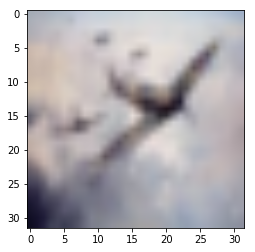

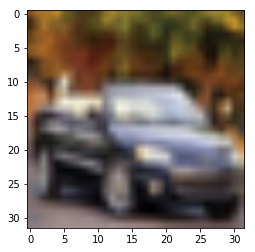

In [12]:
plt.imshow(airplanes[50] / 255, interpolation="bilinear")
plt.show()
plt.imshow(automobiles[50] / 255, interpolation="bilinear")
plt.show()

Create training, validation and testing subsets.

In [22]:
train_size = 4500
valid_size = 250
test_size = 250

In [23]:
train_airplanes = airplanes[:train_size]
valid_airplanes = airplanes[train_size:train_size + valid_size]
test_airplanes = airplanes[train_size + valid_size:train_size + valid_size + test_size]

train_automobiles = automobiles[:train_size]
valid_automobiles = automobiles[train_size:train_size + valid_size]
test_automobiles = automobiles[train_size + valid_size:train_size + valid_size + test_size]

assert len(train_airplanes) == len(train_automobiles) == train_size
assert len(valid_airplanes) == len(valid_automobiles) == valid_size
assert len(test_airplanes) == len(test_automobiles) == test_size

Save the new dataset.

In [24]:
dataset_path = "data/car_v_airplane"

if not os.path.isdir(dataset_path):
    os.makedirs(dataset_path)
    
np.save(os.path.join(dataset_path, "train_airplanes"), train_airplanes)
np.save(os.path.join(dataset_path, "valid_airplanes"), valid_airplanes)
np.save(os.path.join(dataset_path, "test_airplanes"), test_airplanes)

np.save(os.path.join(dataset_path, "train_automobiles"), train_automobiles)
np.save(os.path.join(dataset_path, "valid_automobiles"), valid_automobiles)
np.save(os.path.join(dataset_path, "test_automobiles"), test_automobiles)